# Basic preparations

In this Notebook, the geofabric for the division 4815 of the province of AB, Canada, is extracted from the `BasinMaker` dataset. 

This notebook requires the following information to be manually downloaded (simply run wget on the server):
Alberta Census Boundaries: obtained from https://extranet.gov.ab.ca/srd/geodiscover/srd_pub/boundaries/census/Alberta_Census_Boundaries_SHP.zip
North American Lake-River Routing Product v2.1: two datasets obtained from http://hydrology.uwaterloo.ca/basinmaker/data/original/drainage_region_0002_v2-1.zip and http://hydrology.uwaterloo.ca/basinmaker/data/original/drainage_region_0004_v2-1.zip

Division 4815 is shown below:

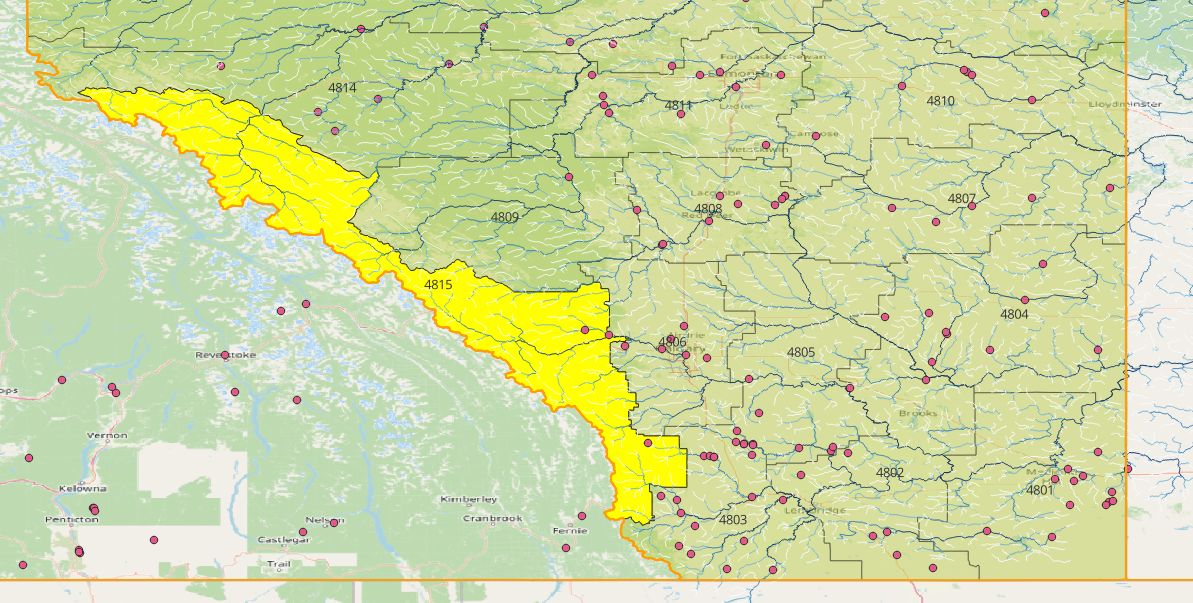

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrant.topology.geom as gm
#hydrant package can be obtained from https://github.com/kasra-keshavarz/hydrant.git

import subprocess
import os

Path definitions (system dependant - modify accordingly):

In [5]:
# geofabric paths

## basin maker path
bm_path = './'

## non contributing areas from merit basins; this is just to avoid current error in hydrant (issue has been flagged)
nc_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes'

## internal boundaries according to Census
intDiv_zipfile = 'Data_AB_CD_2021.zip'

## North American Lake-River Routing Product v2.1
bm_1 = 'drainage_region_0002_v2-1.zip'
bm_2 = 'drainage_region_0004_v2-1.zip'

# output paths
intDiv_out = './intDiv-boundaries/'
intDiv_shapefile = intDiv_out + 'AB_CD_2021.shp'


Extracting zip information from Alberta Census and North American Lake-River Routing Product

In [6]:
#this needs to be corrected
try: 
    subprocess.run(['unzip', intDiv_zipfile, '-d', intDiv_out])
    subprocess.run(['unzip', bm_1, '-d', '.'])
    subprocess.run(['unzip', bm_2, '-d', '.'])
except:
    pass


Archive:  Data_AB_CD_2021.zip
  inflating: ./intDiv-boundaries/AB_CD_2021.cpg  
  inflating: ./intDiv-boundaries/AB_CD_2021.dbf  
  inflating: ./intDiv-boundaries/AB_CD_2021.prj  
  inflating: ./intDiv-boundaries/AB_CD_2021.sbn  
  inflating: ./intDiv-boundaries/AB_CD_2021.sbx  
  inflating: ./intDiv-boundaries/AB_CD_2021.shp  
  inflating: ./intDiv-boundaries/AB_CD_2021.shx  
  inflating: ./intDiv-boundaries/AB_CD_2021.shp.xml  
Archive:  drainage_region_0002_v2-1.zip
   creating: ./drainage_region_0002_v2-1/
  inflating: ./drainage_region_0002_v2-1/catchment_without_merging_lakes_v2-1.CPG  
  inflating: ./drainage_region_0002_v2-1/catchment_without_merging_lakes_v2-1.dbf  
  inflating: ./drainage_region_0002_v2-1/catchment_without_merging_lakes_v2-1.prj  
  inflating: ./drainage_region_0002_v2-1/catchment_without_merging_lakes_v2-1.sbn  
  inflating: ./drainage_region_0002_v2-1/catchment_without_merging_lakes_v2-1.sbx  
  inflating: ./drainage_region_0002_v2-1/catchment_without_mergi

# Reading Geofabric Dataset

## AB boundaries

In [7]:
divisions = gpd.read_file(intDiv_shapefile)

In [8]:
divisions.head(3)

,CDUID,DGUID,CDNAME,CDTYPE,LANDAREA,PRUID,Shape_Leng,Shape_Area,geometry
0,4801,2021A00034801,Division No. 1,CDR,20277.5235,48,731858.147928,2.106613e+10,"POLYGON ((769392.116 5621501.264, 769424.875 5..."
1,4802,2021A00034802,Division No. 2,CDR,17456.3337,48,968124.543163,1.816766e+10,"POLYGON ((703274.537 5666369.084, 703265.420 5..."
2,4803,2021A00034803,Division No. 3,CDR,13725.0719,48,720459.744611,1.401314e+10,"POLYGON ((565857.674 5580957.780, 569640.425 5..."


In [9]:
## adjust division to region of interest
div_4815 = divisions.loc[divisions.CDUID == '4815'].copy().to_crs(epsg=4326)

<Axes: >

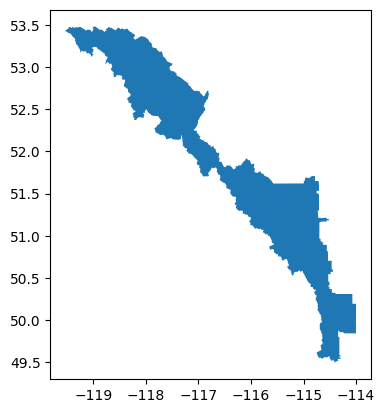

In [10]:
div_4815.plot()

## Basin Maker layers

We use the drainage regions 0002 and 0004 based on the description provided in http://hydrology.uwaterloo.ca/basinmaker/download_regional.html

In [11]:
# file names
cat_files = ['./drainage_region_0002_v2-1/finalcat_info_v2-1.shp',
             './drainage_region_0004_v2-1/finalcat_info_v2-1.shp'
            ]
riv_files = ['./drainage_region_0002_v2-1/finalcat_info_riv_v2-1.shp',
             './drainage_region_0004_v2-1/finalcat_info_riv_v2-1.shp'
            ]
nca_files = ['hillslope_71_clean.shp',
             'hillslope_74_clean.shp',
             'hillslope_82_clean.shp',
            ]
# reading in data
cat = pd.concat([gpd.read_file(os.path.join(bm_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(bm_path, f)) for f in riv_files])
nca = pd.concat([gpd.read_file(os.path.join(nc_path, f)) for f in nca_files])

In [12]:
cat.set_crs(epsg=4326, inplace=True)
nca.set_crs(epsg=4326, inplace=True)
riv.set_crs(epsg=4326, inplace=True)

,SubId,DowSubId,RivSlope,RivLength,BasSlope,BasAspect,BasArea,BkfWidth,BkfDepth,Lake_Cat,...,Seg_order,Max_DEM,Min_DEM,DA_Obs,DA_error,Obs_NM,SRC_obs,centroid_x,centroid_y,geometry
0,2000002,2026370,0.003504,15037.820954,1.247335,153.754091,1.963619e+07,14.397175,0.409195,0,...,1,229.800003,177.100006,0.0,0.0,None,None,-120.680291,64.925016,"MULTILINESTRING ((-120.59333 64.92625, -120.59..."
1,2000003,2000739,0.006512,1535.665738,0.842674,228.376011,2.339839e+06,7.195029,0.269888,0,...,1,230.600006,220.600006,0.0,0.0,None,None,-119.227210,66.434734,"MULTILINESTRING ((-119.24292 66.43167, -119.24..."
2,2000004,2000645,0.004475,1944.243518,1.616548,180.313596,1.065784e+07,4.246515,0.196691,0,...,1,229.800003,221.100006,0.0,0.0,None,None,-118.581641,65.336677,"LINESTRING (-118.57042 65.34500, -118.56958 65..."
3,2000005,2000014,0.000771,0.000000,0.399906,190.215365,3.184584e+06,15.348086,0.425203,1,...,4,230.400009,228.900009,0.0,0.0,None,None,-1.234500,-1.234500,"LINESTRING (-121.28583 67.08500, -121.28625 67..."
4,2000006,2000016,0.000880,0.000000,0.499995,160.529980,1.209991e+07,15.177805,0.422367,1,...,1,230.699997,229.300003,0.0,0.0,None,None,-1.234500,-1.234500,"MULTILINESTRING ((-121.26542 67.09667, -121.26..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65547,4104847,4104448,0.002102,24352.528469,0.868793,157.560135,5.582328e+07,4.838097,0.212701,0,...,1,789.000000,737.799988,0.0,0.0,None,None,-112.322783,50.763901,"MULTILINESTRING ((-112.40167 50.74708, -112.40..."
65548,4104849,4104850,0.001427,0.000000,1.057594,188.556523,1.023423e+07,6.218239,0.247266,1,...,1,788.900024,784.600037,0.0,0.0,None,None,-1.234500,-1.234500,"MULTILINESTRING ((-112.30708 51.02667, -112.30..."
65549,4104850,4104852,0.002083,2256.194403,1.071574,217.716353,9.362791e+06,6.377248,0.251041,0,...,2,789.299988,784.600037,0.0,0.0,None,None,-112.345554,51.015198,"LINESTRING (-112.32750 51.00958, -112.32792 51..."
65550,4104852,4104829,0.002522,1348.065989,1.115201,197.282746,3.482317e+06,10.063667,0.330079,0,...,1,787.600037,784.200012,0.0,0.0,None,None,-112.346964,50.991385,"MULTILINESTRING ((-112.34000 50.99542, -112.34..."


# Preparing `cat`, `riv`, and `nca` objects for AB

## Preparing `catchments` and `rivers` from `MERIT-Basins`

In [13]:
catchments = gm.prepare_cat(cat=cat, cat_col_id='SubId', cst=nca, cst_col_mapper={'FID':'SubId'}, cst_col_id='SubId')

In [14]:
catchments.head(3)

,SubId,DowSubId,RivSlope,RivLength,BasSlope,BasAspect,BasArea,BkfWidth,BkfDepth,Lake_Cat,...,Min_DEM,DA_Obs,DA_error,Obs_NM,SRC_obs,centroid_x,centroid_y,geometry,hillslope,unitarea
0,2000002,2026370.0,0.003504,15037.820954,1.247335,153.754091,1.963619e+07,14.397175,0.409195,0.0,...,177.100006,0.0,0.0,None,None,-120.680291,64.925016,"POLYGON ((-120.74167 64.93708, -120.73583 64.9...",0,NaN
1,2000003,2000739.0,0.006512,1535.665738,0.842674,228.376011,2.339839e+06,7.195029,0.269888,0.0,...,220.600006,0.0,0.0,None,None,-119.227210,66.434734,"POLYGON ((-119.21167 66.45958, -119.21167 66.4...",0,NaN
2,2000004,2000645.0,0.004475,1944.243518,1.616548,180.313596,1.065784e+07,4.246515,0.196691,0.0,...,221.100006,0.0,0.0,None,None,-118.581641,65.336677,"POLYGON ((-118.57000 65.35458, -118.56417 65.3...",0,NaN


In [15]:
rivers = gm.prepare_riv(riv=riv, riv_cols={'id':'SubId', 'next_id':'DowSubId', 'slope':'RivSlope', 'length':'RivLength'}, cat=catchments, cat_cols={'id':'SubId', 'hillslope':'hillslope', 'geom':'geometry'})

In [16]:
rivers.head(3)

,SubId,DowSubId,RivSlope,RivLength,BasSlope,BasAspect,BasArea,BkfWidth,BkfDepth,Lake_Cat,...,Max_DEM,Min_DEM,DA_Obs,DA_error,Obs_NM,SRC_obs,centroid_x,centroid_y,geometry,hillslope
0,2000002,2026370.0,0.003504,15037.820954,1.247335,153.754091,1.963619e+07,14.397175,0.409195,0.0,...,229.800003,177.100006,0.0,0.0,None,None,-120.680291,64.925016,"MULTILINESTRING ((-120.59333 64.92625, -120.59...",0
1,2000003,2000739.0,0.006512,1535.665738,0.842674,228.376011,2.339839e+06,7.195029,0.269888,0.0,...,230.600006,220.600006,0.0,0.0,None,None,-119.227210,66.434734,"MULTILINESTRING ((-119.24292 66.43167, -119.24...",0
2,2000004,2000645.0,0.004475,1944.243518,1.616548,180.313596,1.065784e+07,4.246515,0.196691,0.0,...,229.800003,221.100006,0.0,0.0,None,None,-118.581641,65.336677,"LINESTRING (-118.57042 65.34500, -118.56958 65...",0


## Subsetting AB division 4815 portion

In [17]:
div_4815_catchments, div_4815_rivers = gm.intersect_topology(cat=catchments, cat_cols={'id':'SubId'}, riv=rivers, riv_cols={'id':'SubId', 'next_id':'DowSubId'}, shapefile=div_4815)

In [23]:
# saving data
path_project = os.path.expanduser('~/scratch/MESH-basic')
path_results = os.path.expanduser('~/scratch/MESH-basic/geofabric')

try:
    os.mkdir(path_project)
    os.mkdir(path_results)
except:
    pass

div_4815_catchments.to_file(path_results + '/4815_catchments.shp')
div_4815_rivers.to_file(path_results + '/4815_rivers.shp')
